In [2]:
%pylab inline

import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

Populating the interactive namespace from numpy and matplotlib


# Calculus Warmup

먼저 시작에 앞서 기초적인 calculus 에 대해서 설명하고 들어가겠습니다.<br>
일단 integral 은 다음과 같이 정의 할 수 있습니다.

$$ \begin{align} \int^b_a f(x) dx &= \text{area under the curve. y = f(x)} \\
\int^b_a f(x) dx &= \text{sum of f(x) dx}
\end{align} $$

위 두개의 공식을 연결짓는 것은 다음과 같은 원리 입니다.

$$ \text{area} \sim \text{sum of retangle areas} = 
f(x_1) \Delta x + f(x_2) \Delta x + ... + f(x_n) \Delta x = \sum^n_{i=1} f(x_i) \Delta x $$

여기서 $ \Delta x $ 의 간격이 좁아지면 좁아질 수록, 면적에 대한 approximation은 더 근접해지게 됩니다.

![Sum of Rectables](images/integral.png)

# Distribution Estimation Function

Distribution에 대해서 추정하는 방법은 다음과 같이 합니다.

dist: <scipy.stats._continuous_distns.expon_gen object at 0x7f1e0e8c0ba8>
mean: 0.0010160922565004354
std : 68.62529665330457


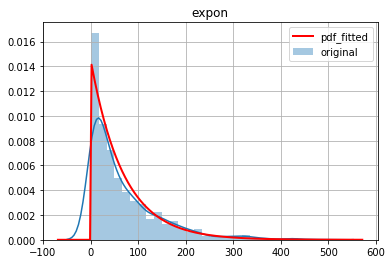

In [324]:
def estimate_distribution(data, dist_name, x_size=200):
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    
    mean = params[-2]
    std = params[-1]
    
    esti_x = np.linspace(np.min(data)-std, np.max(data)+std, x_size)
    esti_y = dist.pdf(esti_x, *params[:-2], loc=mean, scale=std)
    
    sns.distplot(x, bins=30, norm_hist=False, label='original')
    sns.lineplot(esti_x, esti_y, color='red', linewidth=2, label='pdf_fitted')
    plt.title(dist_name)
    return dist, mean, std

x = np.random.gamma(0.7, 100, size=1000)
dist, mean, std = estimate_distribution(x, 'expon')
plt.grid()
print('dist:', dist)
print('mean:', mean)
print('std :', std)

dist: <scipy.stats._continuous_distns.norm_gen object at 0x7f1e0eb8b588>
mean | actual:5  | estimated_mean:5.291768348402416
std  | actual:10 | estimated_std :9.582001074227875


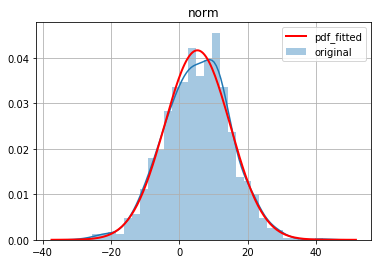

In [323]:
x = np.random.normal(5, 10,  1000)
dist, mean, std = estimate_distribution(x, 'norm')
plt.grid()
print('dist:', dist)
print(f'mean | actual:5  | estimated_mean:{mean}')
print(f'std  | actual:10 | estimated_std :{std}')

# Normal Distribution

## Probability Density Function
$$ \mathcal{N}(x | \mu, \sigma) = P(x) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( -\frac{(x-\mu)^2}{2 \sigma^2} \right) $$

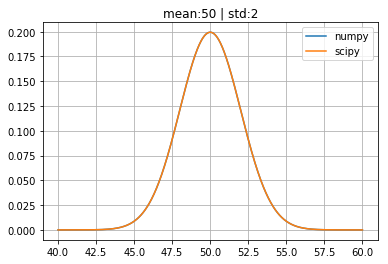

In [322]:
def norm_pdf(x, mean, std):
    var = std**2
    normalize = 1/(np.sqrt(2 * np.pi * var))
    distribution = np.exp( -(x - mean)**2/(2*var))
    return normalize * distribution

mean = 50
std = 2
x = np.linspace(40, 60, 1000)

# PDF in Numpy
y = norm_pdf(x, mean, std)
ax = sns.lineplot(x, y, label='numpy')
ax.set_title(f'mean:{mean} | std:{std}')

# PDF in Scipy
y = stats.norm.pdf(x, mean, std)
ax = sns.lineplot(x, y, label='scipy')
ax.grid()

## Cumulative Distribution Function

P(x)는 위의 PDF함수입니다.

$$ \begin{align} \text{CDF}(x) &= \int^x_{-\infty} P(x) dx \\
&= \frac{1}{\sqrt{2 \pi \sigma^2}} \int^x_{-\infty} \exp \left( \frac{(x-\mu)^2}{2\sigma^2} \right) dx \\
&= \frac{1}{2} \left[ 1 + \text{erf} \left( \frac{x-\mu}{\sigma \sqrt{2}} \right) \right]
\end{align} $$

여기서 erf는 error function (또는 Gauss error function) 으로서 sigmoid shape을 갖고 있으며 다음과 같은 정의를 갖습니다.


$$ \begin{align} 
\text{erf} &= \frac{1}{\sqrt{\pi}} \int^x_{-x} e^{-t^2} dt \\
&= \frac{2}{\sqrt{\pi}} \int^x_{0} e^{-t^2} dt 
\end{align} $$


여기서 erf는 error function으로 불리며, scipy.special.erf 로 Python에서 제공되고 있습니다.

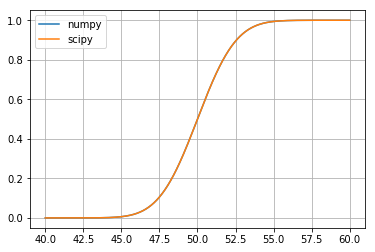

In [325]:
from scipy.special import erf

def norm_cdf(x, mean, std):
    _erf = (x-mean)/(std * np.sqrt(2))
    return 1/2 * (1 + erf(_erf))

mean = 50
std = 2
x = np.linspace(40, 60, 1000)

# Numpy CDF
y = norm_cdf(x, mean, std)
sns.lineplot(x, y, label='numpy')

# Scipy CDF
y = stats.norm.cdf(x, mean, std)
ax = sns.lineplot(x, y, label='scipy')
ax.grid()

# Skewed Normal Distribution

## Probability Density Function

- $ \phi $ 는 normal distribution의 probability density function.
- $ \Phi $ 는 $ \phi $ 에 대응하는 CDF

$$ \begin{align} 
\phi(x) &= \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( -\frac{(x-\mu)^2}{2 \sigma^2} \right) \\
\Phi(x) &= \int^x_{-\infty} \phi(t) dt 
= \frac{1}{2} \left[ 1 + \text{erf} \left( \frac{x}{\sqrt{2}} \right) \right]
\end{align} $$



**Skewed Normal Distribution은 다음과 같이 정의**할수 있으며, $ \alpha $ 는 특정 상수값

$$ f_{\alpha} (x) = 2 \phi(x) \Phi(\alpha x) $$


1. $ \alpha $ : shape parameter라고 부르며 $ \alpha = 0 $ 일때 일반적은 normal distribution과 동일
2. $ \alpha \rightarrow \infty $ 일때, density는 half-normal desity function으로 수렴됨
3. $ \alpha $ 값이 positive value이면 left skewed 를 보이고, negative일때는 right skewed 를 보인다


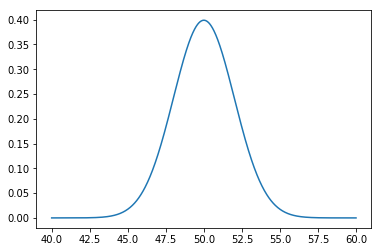

In [320]:

def skewnorm_pdf(x, alpha, loc, std):
    return 2 * norm_dist(x, loc, std) * norm_cdf(alpha * x, loc, std)
alpha = 4.
loc = 50
std = 2
x = np.linspace(40, 60, 1000)

y = skewnorm_pdf(x, alpha, loc, std)
sns.lineplot(x, y)

skewnorm = stats.skewnorm(a=alpha, loc=loc, scale=std)
# y = skewnorm.pdf(x)
# sns.lineplot(x, y)

### Estimate Skewed Normal Distribution

(21.439544511528105, 99.91922905178455, 50.89389163185977)
mean: 99.91922905178455
std: 50.89389163185977
params: (21.439544511528105, 99.91922905178455, 50.89389163185977)


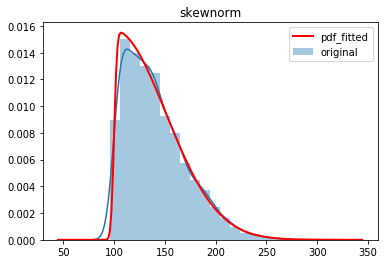

In [175]:
def estimate_distribution(data, dist_name, x_size=200):
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    print(params)
    
    mean = params[-2]
    std = params[-1]
    
    esti_x = np.linspace(np.min(data)-std, np.max(data)+std, x_size)
    esti_y = dist.pdf(esti_x, *params[:-2], loc=mean, scale=std)
    
    sns.distplot(data, bins=20, norm_hist=False, label='original')
    sns.lineplot(esti_x, esti_y, color='red', linewidth=2, label='pdf_fitted')
    plt.title(dist_name)
    return dist, mean, std, params

rand_values = stats.skewnorm.rvs(a=20, loc=100, scale=50, size=5000)
dist, mean, std, params = estimate_distribution(rand_values, 'skewnorm')
print('mean:', mean)
print('std:', std)
print('params:', params)


### PDF

PDF를 사용하는 두가지 방법은 다음과 같습니다. 

첫번째는 stats.skewnorm.pdf 함수를 사용합니다.

```
stats.skewnorm.pdf(x, 기울기, mean, std)
```

두번째는 estimated distribution을 사용합니다.
이때 기울기는 넣어주어야 합니다.

```
dist.pdf(x, 기울기)
```

$$ \phi $$

TypeError: _parse_args() takes from 1 to 3 positional arguments but 4 were given

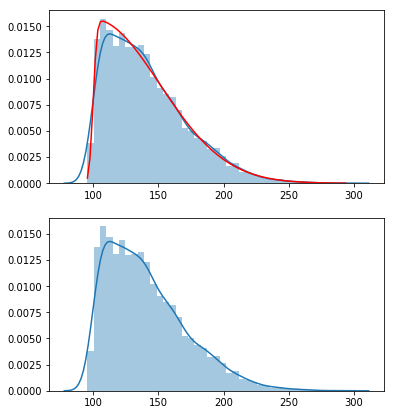

In [274]:
fig, plots = subplots(2, figsize=(6, 7))

x = np.linspace(np.min(rand_values), np.max(rand_values), 100)

sns.distplot(rand_values, ax=plots[0])
sns.lineplot(x, stats.skewnorm.pdf(x, *params), color='red', ax=plots[0])

sns.distplot(rand_values, ax=plots[1])
sns.lineplot(x, dist.pdf(x, *params), color='red', ax=plots[1])

# Gamma Distribution

Beta distribution과 유사하나, Beta distribution의 경우 0~1상이의 값을 갖


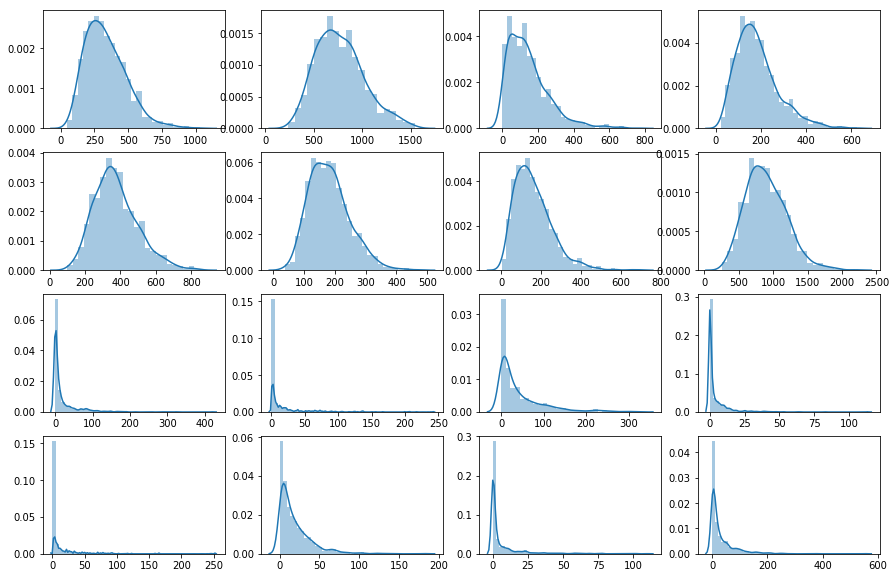

In [104]:
def visualize_gamma():
    fig, plots = plt.subplots(4, 4, figsize=(15, 10))
    
    plots = plots.reshape(-1)
    for i, plot in enumerate(plots):
        if i < 8:
            x = np.random.gamma(np.random.randint(100) / 10, 
                                np.random.randint(100), size=1000)
        else:
            x = np.random.gamma(np.random.ranf(), 
                                np.random.randint(100), size=1000)
        sns.distplot(x, ax=plot)
    
visualize_gamma()

mean: 2.1165346027707896e-05 std: 2.564117787335898
mean: 1.0
std : 1.0
var : 1.0


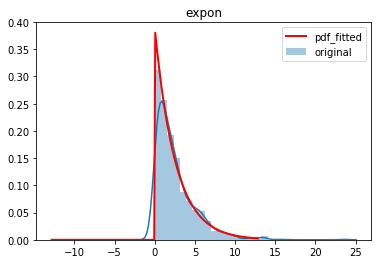

In [246]:
x = np.random.exponential(2.5, size=1000)
dist = estimate_distribution(x, 'expon')
print('mean:', dist.mean())
print('std :', dist.std())
print('var :', dist.var())